<a href="https://colab.research.google.com/github/Ishanavi/ProLogisticRegression/blob/main/ProLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_upload = files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("escape_velocity.csv")

esc_list = df["Escaped"].tolist()
vel_list = df["Velocity"].tolist()

fig = px.scatter(x=vel_list, y=esc_list)
fig.show()

In [3]:
import numpy as np

vel_array = np.array(vel_list)
esc_array = np.array(esc_list)

m,c = np.polyfit(vel_array,esc_array,1)
y = []

for x in vel_array:
  y_value = m*x + c
  y.append(y_value)

fig = px.scatter(x=vel_array, y=esc_array)
fig.update_layout(shapes=[
                          dict(
                              type = 'line',
                              y0 = min(y),
                              y1 = max(y),
                              x0 = min(vel_array),
                              x1 = max(vel_array)
                          )])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



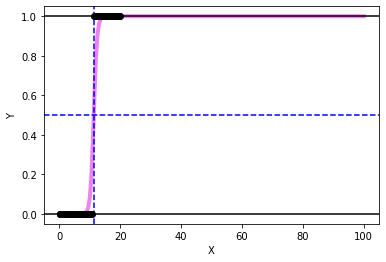

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(vel_list,(len(vel_list),1))
Y = np.reshape(esc_list,(len(esc_list),1))

lr = LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(), Y, color="black", zorder=20)

def model(x):
  return 1/(1 + np.exp(-x))

x_test = np.linspace(0,100,200)
chances = model(x_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(x_test, chances, color="violet", linewidth = 4)
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')
plt.axhline(y=0.5, color='b', linestyle='--')

plt.axvline(x = x_test[23], color='b', linestyle='--')

plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [11]:
user_vel = float(input("Enter your velocity --> "))
chances = model(user_vel * lr.coef_ + lr.intercept_).ravel()[0]

if chances < 0.01:
  print("Creature will not be able toescape")

elif chances >= 1:
  print("Creature will be able to escape")

elif chances < 0.5:
  print("Creature might not be able to escape")

else:
  print("Creature might be able to escape")

Enter your velocity --> 40
Creature will be able to escape
